In [57]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [58]:
#Loaded dataset
df = pd.read_csv('../data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [59]:
#Categorical Variable Encoding
df = pd.get_dummies(df, drop_first=True)

In [60]:
#Basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math score                                     1000 non-null   int64
 1   reading score                                  1000 non-null   int64
 2   writing score                                  1000 non-null   int64
 3   gender_male                                    1000 non-null   bool 
 4   race/ethnicity_group B                         1000 non-null   bool 
 5   race/ethnicity_group C                         1000 non-null   bool 
 6   race/ethnicity_group D                         1000 non-null   bool 
 7   race/ethnicity_group E                         1000 non-null   bool 
 8   parental level of education_bachelor's degree  1000 non-null   bool 
 9   parental level of education_high school        1000 non-null   bool 
 10  p

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


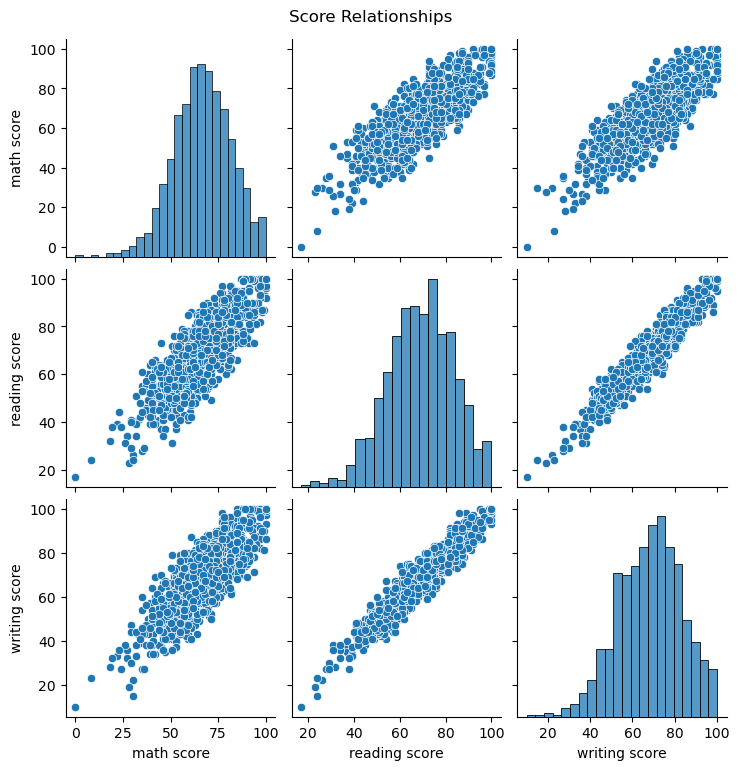

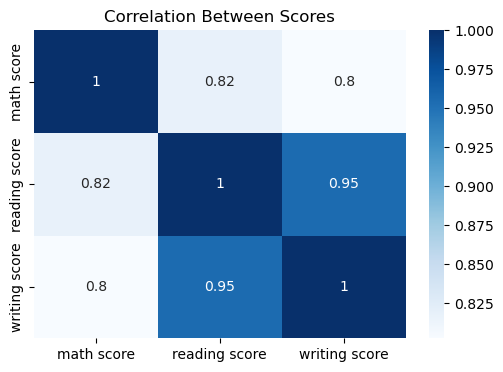

In [61]:
#Visualize Score Correlation
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Score Relationships", y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Scores")
plt.show()

In [62]:
#Feature Selection
X = df[['reading score', 'writing score']]
y = df['math score']

In [63]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [65]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())

Cross-Validation Scores: [0.74487215 0.63991078 0.62119756 0.66809243 0.66803503]
Average CV Score: 0.668421589065461


In [67]:
#Make Predictions
y_pred = model.predict(X_test)

In [68]:
#Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 77.24
R2 Score: 0.68


In [69]:
#Save the Trained Model
import joblib
joblib.dump(model, 'student_performance_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [70]:
#Load the model
loaded_model = joblib.load('student_performance_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

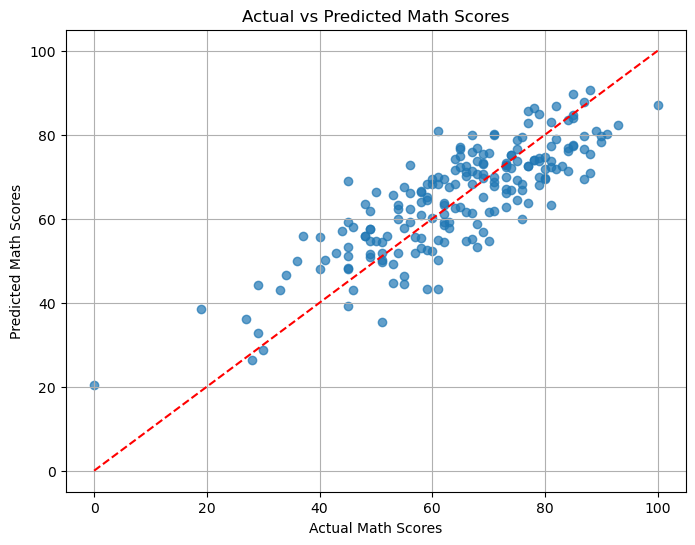

In [71]:
#Visualization of Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()


In [72]:
#Predict Custom Input
sample = pd.DataFrame({'reading score': [88], 'writing score': [90]})
sample_scaled = scaler.transform(sample)
predicted_math = model.predict(sample_scaled)
print(f"Predicted Math Score: {predicted_math[0]:.2f}")

Predicted Math Score: 82.97
